### 【問題1】全結合層のクラス化
全結合層のクラス化を行なってください。<br>

### 【問題2】初期化方法のクラス化
初期化を行うコードをクラス化してください。<br>

### 【問題3】最適化手法のクラス化
最適化手法のクラス化を行なってください。<br>

### 【問題4】活性化関数のクラス化
活性化関数のクラス化を行なってください。<br>

### 【問題5】ReLUクラスの作成
現在一般的に使われている活性化関数であるReLU（Rectified Linear Unit）をReLUクラスとして実装してください。<br>

### 【問題6】重みの初期値
ここまでは重みやバイアスの初期値は単純にガウス分布で、標準偏差をハイパーパラメータとして扱ってきました。しかし、どのような値にすると良いかが知られています。シグモイド関数やハイパボリックタンジェント関数のときは Xavierの初期値 （またはGlorotの初期値）、ReLUのときは Heの初期値 が使われます。<br>
XavierInitializerクラスと、HeInitializerクラスを作成してください。<br>

### 【問題7】最適化手法
学習率は学習過程で変化させていく方法が一般的です。基本的な手法である AdaGrad のクラスを作成してください。<br>

### 【問題8】クラスの完成
任意の構成で学習と推定が行えるScratchDeepNeuralNetrowkClassifierクラスを完成させてください。<br>


In [10]:
from keras.datasets import mnist
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


class Tanh():
    """
    ハイパボリックタンジェント関数による計算
    Parameters
    ----------
    """
    def __init__(self):
        pass

    def forward(self, A):
        """
        フォワードプロバゲーション時の計算
        Parameters
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes?)
            入力
        Returns
        ----------
        Z : 次の形のndarray, shape (batch_size, n_nodes?)
            出力
        """
        self.A = A
        # ハイボリックタンジェント関数
        Z = np.tanh(self.A)

        return Z

    def backward(self, Z):
        """
        バックプロバゲーション時の計算
        Parameters
        ----------
        Z : 次の形のndarray, shape (batch_size, n_nodes?)
            入力
        Returns
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes?)
            出力
        """
        A = Z * (1 - np.tanh(self.A) ** 2)

        return A


class ReLU():
    """
    ReLU関数による計算
    Parameters
    ----------
    """
    def __init__(self):
        pass

    def forward(self, A):
        """
        フォワードプロバゲーション時の計算
        Parameters
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes?)
            入力
        Returns
        ----------
        Z : 次の形のndarray, shape (batch_size, n_nodes?)
            出力
        """
        self.A = A
        # ハイボリックタンジェント関数
        Z = np.maximum(0, self.A)

        return Z

    def backward(self, Z):
        """
        バックプロバゲーション時の計算
        Parameters
        ----------
        Z : 次の形のndarray, shape (batch_size, n_nodes?)
            入力
        Returns
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes?)
            出力
        """
        A = Z * (1 - np.maximum(0, self.A) ** 2)

        return A

    
class Softmax():
    """
    ソフトマックス関数による計算
    Parameters
    ----------
    """
    def __init__(self):
        pass

    def forward(self, A):
        """
        フォワードプロバゲーション時の計算
        Parameters
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes?)
            入力
        Returns
        ----------
        Z : 次の形のndarray, shape (batch_size, n_nodes?)
            出力
        """
        # ソフトマックス関数
        Z = (np.exp(A) / np.sum(np.exp(A)))

        return Z

    def backward(self, Z, Y):
        """
        バックプロバゲーション時の計算＋交差エントロピー誤差
        Parameters
        ----------
        Z : 次の形のndarray, shape (batch_size, n_nodes?)
            入力
        Y : 次の形のndarray, shape (batch_size, n_nodes?)
            入力
        Returns
        ----------
        Z : 次の形のndarray, shape (batch_size, n_nodes?)
            出力
        """

        # ソフトマックス関数
        A = Z - Y

        # エラーを起こさないための微小値
        delta = 1e-7
        # 交差エントロピー誤差　←　毎回計算する必要ある？？？
        self.L = - np.sum(Y * np.log(Z + delta)) / len(Y)

        return Z


class SGD:
    """
    確率的勾配降下法
    Parameters
    ----------
    lr : 学習率
    """
    def __init__(self, lr):
        self.lr = lr

    def update(self, layer):
        """
        ある層の重みやバイアスの更新
        Parameters
        ----------
        layer : 更新前の層のインスタンス
        """
        layer.W = layer.W - (self.lr * layer.dW)
        layer.B = layer.B - (self.lr * layer.dB)


class AdaGrad:
    """
    AdaGradによる学習率の更新
    Parameters
    ----------
    lr : 学習率
    """
    def __init__(self, lr):
        self.lr = lr
        self.hW = 0
        self.hB = 0
#         self.hW = None
#         self.hB = None

    def update(self, layer):
        """
        ある層の重みやバイアスの更新
        Parameters
        ----------
        layer : 更新前の層のインスタンス
        """
        # エラーを起こさないための微小値
        delta = 1e-7
#         if self.hW is None:
#             self.hW = layer.dW ** 2
#             self.hB = layer.dB ** 2
#         else:
#             self.hW += layer.dW ** 2
#             self.hB += layer.dB ** 2
        self.hW += layer.dW ** 2
        self.hB += layer.dB ** 2

        layer.W = layer.W - (self.lr * layer.dW / (np.sqrt(self.hW) + delta))
        layer.B = layer.B - (self.lr * layer.dW / (np.sqrt(self.hB) + delta))


class SimpleInitializer:
    """
    ガウス分布によるシンプルな初期化
    Parameters
    ----------
    sigma : float
      ガウス分布の標準偏差
    """
    def __init__(self, sigma):
        self.sigma = sigma

    def W(self, n_nodes1, n_nodes2):
        """
        重みの初期化
        Parameters
        ----------
        n_nodes1 : int
          前の層のノード数
        n_nodes2 : int
          後の層のノード数
        Returns
        ----------
        W :
        """
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)

        return W

    def B(self, n_nodes2):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes2 : int
          後の層のノード数
        Returns
        ----------
        B :
        """
        B = n_nodes2

        return B


class HeInitializer:
    """
    Heによる初期化
    Parameters
    ----------
    """
    def __init__(self):
        pass

    def W(self, n_nodes1, n_nodes2):
        """
        重みの初期化
        Parameters
        ----------
        n_nodes1 : int
          前の層のノード数
        n_nodes2 : int
          後の層のノード数
        Returns
        ----------
        W :
        """
        # Heによる重みの初期化
        W = np.sqrt(2 / n_nodes1) * np.random.randn(n_nodes1, n_nodes2)

        return W

    def B(self, n_nodes2):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes2 : int
          後の層のノード数
        Returns
        ----------
        B :
        """
        B = n_nodes2

        return B


class FC:
    """
    ノード数n_nodes1からn_nodes2への全結合層
    Parameters
    ----------
    n_nodes1 : int
      前の層のノード数
    n_nodes2 : int
      後の層のノード数
    initializer : 初期化方法のインスタンス
    optimizer : 最適化手法のインスタンス
    """

    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        # 初期化
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.initializer = initializer
        self.optimizer = optimizer
        # initializerのメソッドを使い、self.Wとself.Bを初期化する
        self.W = initializer.W(self.n_nodes1, self.n_nodes2)
        self.B = initializer.B(self.n_nodes2)

    def forward(self, X):
        """
        フォワード
        Parameters
        ----------
        X(or Z) : 次の形のndarray, shape (batch_size, n_nodes1)
            入力
        Returns
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes2)
            出力
        """
        self.Z = X
        A = X @ self.W + self.B

        return A

    def backward(self, dA):
        """
        バックワード
        Parameters
        ----------
        dA : 次の形のndarray, shape (batch_size, n_nodes2)
            後ろから流れてきた勾配
        Returns
        ----------
        dZ : 次の形のndarray, shape (batch_size, n_nodes1)
            前に流す勾配
        """
        # 重みに対する勾配
        self.dW = self.Z.T @ dA
        dZ = dA @ self.dW.T

        # バイアス項に対する勾配
        self.dB = np.sum(dA, axis=0)

        # 更新
        self = self.optimizer.update(self)

        return dZ


class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
#         self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(int)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]


class ScratchDeepNeuralNetrowkClassifier():
    """
    シンプルな三層ニューラルネットワーク分類器
    Parameters
    ----------
    Attributes
    ----------
    """
    def __init__(self, sigma, batch_size, n_features, n_nodes1, n_nodes2, n_output, num_iter=10, lr=0.0005, verbose = False):
        self.sigma = sigma # ガウス分布（正規分布）用の標準偏差
        self.lr = lr # 学習率

        self.batch_size = batch_size # バッチサイズ
        self.n_features = n_features # 特徴量の数
        self.n_nodes1 = n_nodes1 # 1層目のノード数
        self.n_nodes2 = n_nodes2 # 2層目のノード数
        self.n_output = n_output # 出力のクラス数（3層目のノード数）
        self.num_iter = num_iter # イテレーション回数
        self.verbose = verbose

    def fit(self, X, y, X_val=None, y_val=None, fp="sigmoid"):
        """
        ニューラルネットワーク分類器を学習する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """

        print("特徴量ベクトル(batch_size, n_features)：{}".format(X.shape))
        print("バッチサイズ(self.batch_size) : {}".format(self.batch_size)) # バッチサイズ
        print("特徴量の数(self.n_features) : {}".format(self.n_features)) # 特徴量の数
        print("1層目のノード数(self.n_nodes1) : {}".format(self.n_nodes1)) # 1層目のノード数
        print("2層目のノード数(self.n_nodes2) : {}".format(self.n_nodes2)) # 2層目のノード数
        print("出力のクラス数（3層目のノード数）(self.n_output): {}".format(self.n_output)) # 出力のクラス数（3層目のノード数）

        # self.sigma : ガウス分布の標準偏差
        # self.lr : 学習率
        # self.n_nodes1 : 1層目のノード数
        # self.n_nodes2 : 2層目のノード数
        # self.n_output : 出力層のノード数

        self.cee_array = []

        for num_iter in range(self.num_iter):

            # 初期化と宣言
            optimizer1 = SGD(self.lr)
            optimizer2 = SGD(self.lr)
            optimizer3 = SGD(self.lr)
#             optimizer1 = AdaGrad(self.lr)
#             optimizer2 = AdaGrad(self.lr)
#             optimizer3 = AdaGrad(self.lr)
#             s_initializer_1 = SimpleInitializer(self.sigma)
#             s_initializer_2 = SimpleInitializer(self.sigma)
#             s_initializer_3 = SimpleInitializer(self.sigma)
            h_initializer_1 = HeInitializer()
            h_initializer_2 = HeInitializer()
            h_initializer_3 = HeInitializer()
            self.FC1 = FC(self.n_features, self.n_nodes1, h_initializer_1, optimizer1)
            self.activation1 = Tanh()
#             self.activation1 = ReLU()
            self.FC2 = FC(self.n_nodes1, self.n_nodes2, h_initializer_2, optimizer2)
            self.activation2 = Tanh()
#             self.activation2 = ReLU()
            self.FC3 = FC(self.n_nodes2, self.n_output, h_initializer_3, optimizer3)
            self.activation3 = Softmax()

            # ミニバッチ処理
            get_mini_batch = GetMiniBatch(X, y, self.batch_size)
            # get_mini_batch = GetMiniBatch(X, y, batch_size=20)

            for mini_X_train, mini_y_train in get_mini_batch:

                ### フォワードプロバゲーション

                ### 1層目
                A1 = self.FC1.forward(mini_X_train)
                Z1 = self.activation1.forward(A1)

                ### 2層目
                A2 = self.FC2.forward(Z1)
                Z2 = self.activation2.forward(A2)

                ### 3層目
                A3 = self.FC3.forward(Z2)
                Z3 = self.activation3.forward(A3)

                ### バックプロバゲーション
                ### 3層目
                dA3 = self.activation3.backward(Z3, mini_y_train) # 交差エントロピー誤差とソフトマックスを合わせている
                dZ2 = self.FC3.backward(dA3)

                ### 2層目
                dA2 = self.activation2.backward(dZ2)
                dZ1 = self.FC2.backward(dA2)

                ### 1層目
                dA1 = self.activation1.backward(dZ1)
                dZ0 = self.FC1.backward(dA1) # dZ0は使用しない

            # 交差エントロピーの記録
            self.cee_array.append(self.activation3.L)

    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        ### フォワードプロバゲーション
        ### 1層目
        A1 = self.FC1.forward(X)
        Z1 = self.activation1.forward(A1)
        ### 2層目
        A2 = self.FC2.forward(Z1)
        Z2 = self.activation2.forward(A2)
        ### 3層目
        A3 = self.FC3.forward(Z2)
        Z3 = self.activation3.forward(A3)

        # 最も高い確率(z3内のデータ)を判定
        max_Z3_index = np.argmax(Z3)
        max_Z3 = Z3.flatten()[max_Z3_index]

        return max_Z3


In [11]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

X_train = X_train.astype(float)
X_test = X_test.astype(float)
X_train /= 255
X_test /= 255

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
# print(y_train.shape) # (60000,)
# print(y_train_one_hot.shape) # (60000, 10)
# print(y_train_one_hot.dtype) # float64

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2)
# print(X_train.shape) # (48000, 784)
# print(X_val.shape) # (12000, 784)
# print(y_train.shape) # (48000, 10)
# print(y_val.shape) # (12000, 10)

# クラス宣言時の引数
sigma = 0.01 # ガウス分布（正規分布）用の標準偏差
batch_size = 20 # バッチサイズ
n_features = 784 # 特徴量の数
n_nodes1 = 400 # 1層目のノード数
n_nodes2 = 200 # 2層目のノード数
n_output = 10 # 出力のクラス数（3層目のノード数）
num_iter = 5 # イテレーション回数
lr = 0.000000001 # 学習率
verbose = False

# インスタンス化
sdnnc = ScratchDeepNeuralNetrowkClassifier(sigma, batch_size, n_features, n_nodes1, n_nodes2, n_output, num_iter, lr, verbose)
# fit関数呼び出し
sdnnc.fit(X_train, y_train, X_val, y_val)
accuracy = sdnnc.predict(X_test)
print(accuracy)

特徴量ベクトル(batch_size, n_features)：(48000, 784)
バッチサイズ(self.batch_size) : 20
特徴量の数(self.n_features) : 784
1層目のノード数(self.n_nodes1) : 400
2層目のノード数(self.n_nodes2) : 200
出力のクラス数（3層目のノード数）(self.n_output): 10
3.210146079605473e-05


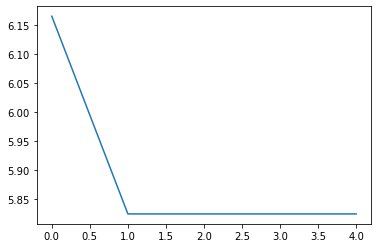

In [12]:
plt.plot(range(len(sdnnc.cee_array)), sdnnc.cee_array)
plt.show()

### 【問題9】学習と推定
層の数や活性化関数を変えたいくつかのネットワークを作成してください。そして、MNISTのデータを学習・推定し、Accuracyを計算してください。<br>

In [37]:
from keras.datasets import mnist
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


class Tanh():
    """
    ハイパボリックタンジェント関数による計算
    Parameters
    ----------
    """
    def __init__(self):
        pass

    def forward(self, A):
        """
        フォワードプロバゲーション時の計算
        Parameters
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes?)
            入力
        Returns
        ----------
        Z : 次の形のndarray, shape (batch_size, n_nodes?)
            出力
        """
        self.A = A
        # ハイボリックタンジェント関数
        Z = np.tanh(self.A)

        return Z

    def backward(self, Z):
        """
        バックプロバゲーション時の計算
        Parameters
        ----------
        Z : 次の形のndarray, shape (batch_size, n_nodes?)
            入力
        Returns
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes?)
            出力
        """
        A = Z * (1 - np.tanh(self.A) ** 2)

        return A


class ReLU():
    """
    ReLU関数による計算
    Parameters
    ----------
    """
    def __init__(self):
        pass

    def forward(self, A):
        """
        フォワードプロバゲーション時の計算
        Parameters
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes?)
            入力
        Returns
        ----------
        Z : 次の形のndarray, shape (batch_size, n_nodes?)
            出力
        """
        self.A = A
        # ハイボリックタンジェント関数
        Z = np.maximum(0, self.A)

        return Z

    def backward(self, Z):
        """
        バックプロバゲーション時の計算
        Parameters
        ----------
        Z : 次の形のndarray, shape (batch_size, n_nodes?)
            入力
        Returns
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes?)
            出力
        """
        A = Z * (1 - np.maximum(0, self.A) ** 2)

        return A

    
class Softmax():
    """
    ソフトマックス関数による計算
    Parameters
    ----------
    """
    def __init__(self):
        pass

    def forward(self, A):
        """
        フォワードプロバゲーション時の計算
        Parameters
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes?)
            入力
        Returns
        ----------
        Z : 次の形のndarray, shape (batch_size, n_nodes?)
            出力
        """
        # ソフトマックス関数
        Z = (np.exp(A) / np.sum(np.exp(A)))

        return Z

    def backward(self, Z, Y):
        """
        バックプロバゲーション時の計算＋交差エントロピー誤差
        Parameters
        ----------
        Z : 次の形のndarray, shape (batch_size, n_nodes?)
            入力
        Y : 次の形のndarray, shape (batch_size, n_nodes?)
            入力
        Returns
        ----------
        Z : 次の形のndarray, shape (batch_size, n_nodes?)
            出力
        """

        # ソフトマックス関数
        A = Z - Y

        # エラーを起こさないための微小値
        delta = 1e-7
        # 交差エントロピー誤差　←　毎回計算する必要ある？？？
        self.L = - np.sum(Y * np.log(Z + delta)) / len(Y)

        return Z


class SGD:
    """
    確率的勾配降下法
    Parameters
    ----------
    lr : 学習率
    """
    def __init__(self, lr):
        self.lr = lr

    def update(self, layer):
        """
        ある層の重みやバイアスの更新
        Parameters
        ----------
        layer : 更新前の層のインスタンス
        """
        layer.W = layer.W - (self.lr * layer.dW)
        layer.B = layer.B - (self.lr * layer.dB)


class AdaGrad:
    """
    AdaGradによる学習率の更新
    Parameters
    ----------
    lr : 学習率
    """
    def __init__(self, lr):
        self.lr = lr
        self.hW = 0
        self.hB = 0
#         self.hW = None
#         self.hB = None

    def update(self, layer):
        """
        ある層の重みやバイアスの更新
        Parameters
        ----------
        layer : 更新前の層のインスタンス
        """
        # エラーを起こさないための微小値
        delta = 1e-7
#         if self.hW is None:
#             self.hW = layer.dW ** 2
#             self.hB = layer.dB ** 2
#         else:
#             self.hW += layer.dW ** 2
#             self.hB += layer.dB ** 2
        self.hW += layer.dW ** 2
        self.hB += layer.dB ** 2

        layer.W = layer.W - (self.lr * layer.dW / (np.sqrt(self.hW) + delta))
        layer.B = layer.B - (self.lr * layer.dW / (np.sqrt(self.hB) + delta))


class SimpleInitializer:
    """
    ガウス分布によるシンプルな初期化
    Parameters
    ----------
    sigma : float
      ガウス分布の標準偏差
    """
    def __init__(self, sigma):
        self.sigma = sigma

    def W(self, n_nodes1, n_nodes2):
        """
        重みの初期化
        Parameters
        ----------
        n_nodes1 : int
          前の層のノード数
        n_nodes2 : int
          後の層のノード数
        Returns
        ----------
        W :
        """
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)

        return W

    def B(self, n_nodes2):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes2 : int
          後の層のノード数
        Returns
        ----------
        B :
        """
        B = n_nodes2

        return B


class HeInitializer:
    """
    Heによる初期化
    Parameters
    ----------
    """
    def __init__(self):
        pass

    def W(self, n_nodes1, n_nodes2):
        """
        重みの初期化
        Parameters
        ----------
        n_nodes1 : int
          前の層のノード数
        n_nodes2 : int
          後の層のノード数
        Returns
        ----------
        W :
        """
        # Heによる重みの初期化
        W = np.sqrt(2 / n_nodes1) * np.random.randn(n_nodes1, n_nodes2)

        return W

    def B(self, n_nodes2):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes2 : int
          後の層のノード数
        Returns
        ----------
        B :
        """
        B = n_nodes2

        return B


class FC:
    """
    ノード数n_nodes1からn_nodes2への全結合層
    Parameters
    ----------
    n_nodes1 : int
      前の層のノード数
    n_nodes2 : int
      後の層のノード数
    initializer : 初期化方法のインスタンス
    optimizer : 最適化手法のインスタンス
    """

    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        # 初期化
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.initializer = initializer
        self.optimizer = optimizer
        # initializerのメソッドを使い、self.Wとself.Bを初期化する
        self.W = initializer.W(self.n_nodes1, self.n_nodes2)
        self.B = initializer.B(self.n_nodes2)

    def forward(self, X):
        """
        フォワード
        Parameters
        ----------
        X(or Z) : 次の形のndarray, shape (batch_size, n_nodes1)
            入力
        Returns
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes2)
            出力
        """
        self.Z = X
        A = X @ self.W + self.B

        return A

    def backward(self, dA):
        """
        バックワード
        Parameters
        ----------
        dA : 次の形のndarray, shape (batch_size, n_nodes2)
            後ろから流れてきた勾配
        Returns
        ----------
        dZ : 次の形のndarray, shape (batch_size, n_nodes1)
            前に流す勾配
        """
        # 重みに対する勾配
        self.dW = self.Z.T @ dA
        dZ = dA @ self.dW.T

        # バイアス項に対する勾配
        self.dB = np.sum(dA, axis=0)

        # 更新
        self = self.optimizer.update(self)

        return dZ


class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
#         self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(int)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]


class ScratchDeepNeuralNetrowkClassifier_N():
    """
    シンプルな三層ニューラルネットワーク分類器
    Parameters
    ----------
    Attributes
    ----------
    """
    def __init__(self, sigma, batch_size, n_features, n_nodes1, n_nodes2, n_nodes3, n_output, num_iter=10, lr=0.0005, verbose = False):
        self.sigma = sigma # ガウス分布（正規分布）用の標準偏差
        self.lr = lr # 学習率

        self.batch_size = batch_size # バッチサイズ
        self.n_features = n_features # 特徴量の数
        self.n_nodes1 = n_nodes1 # 1層目のノード数
        self.n_nodes2 = n_nodes2 # 2層目のノード数
        self.n_nodes3 = n_nodes3 # 3層目のノード数
        self.n_output = n_output # 出力のクラス数（3層目のノード数）
        self.num_iter = num_iter # イテレーション回数
        self.verbose = verbose

    def fit(self, X, y, X_val=None, y_val=None, fp="sigmoid"):
        """
        ニューラルネットワーク分類器を学習する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """

        print("特徴量ベクトル(batch_size, n_features)：{}".format(X.shape))
        print("バッチサイズ(self.batch_size) : {}".format(self.batch_size)) # バッチサイズ
        print("特徴量の数(self.n_features) : {}".format(self.n_features)) # 特徴量の数
        print("1層目のノード数(self.n_nodes1) : {}".format(self.n_nodes1)) # 1層目のノード数
        print("2層目のノード数(self.n_nodes2) : {}".format(self.n_nodes2)) # 2層目のノード数
        print("3層目のノード数(self.n_nodes3) : {}".format(self.n_nodes3)) # 2層目のノード数
        print("出力のクラス数（3層目のノード数）(self.n_output): {}".format(self.n_output)) # 出力のクラス数（3層目のノード数）

        # self.sigma : ガウス分布の標準偏差
        # self.lr : 学習率
        # self.n_nodes1 : 1層目のノード数
        # self.n_nodes2 : 2層目のノード数
        # self.n_output : 出力層のノード数

        self.cee_array = []

        for num_iter in range(self.num_iter):

            # 初期化と宣言
            optimizer1 = SGD(self.lr)
            optimizer2 = SGD(self.lr)
            optimizer3 = SGD(self.lr)
            optimizer4 = SGD(self.lr)
#             optimizer1 = AdaGrad(self.lr)
#             optimizer2 = AdaGrad(self.lr)
#             optimizer3 = AdaGrad(self.lr)
#             optimizer4 = AdaGrad(self.lr)
#             s_initializer_1 = SimpleInitializer(self.sigma)
#             s_initializer_2 = SimpleInitializer(self.sigma)
#             s_initializer_3 = SimpleInitializer(self.sigma)
#             s_initializer_4 = SimpleInitializer(self.sigma)
            h_initializer_1 = HeInitializer()
            h_initializer_2 = HeInitializer()
            h_initializer_3 = HeInitializer()
            h_initializer_4 = HeInitializer()
            self.FC1 = FC(self.n_features, self.n_nodes1, h_initializer_1, optimizer1)
            self.activation1 = Tanh()
#             self.activation1 = ReLU()
            self.FC2 = FC(self.n_nodes1, self.n_nodes2, h_initializer_2, optimizer2)
            self.activation2 = Tanh()
#             self.activation2 = ReLU()
            self.FC3 = FC(self.n_nodes2, self.n_nodes3, h_initializer_3, optimizer3)
            self.activation3 = Tanh()
#             self.activation3 = ReLU()
            self.FC4 = FC(self.n_nodes3, self.n_output, h_initializer_4, optimizer4)
            self.activation4 = Softmax()

            # ミニバッチ処理
            get_mini_batch = GetMiniBatch(X, y, self.batch_size)
            # get_mini_batch = GetMiniBatch(X, y, batch_size=20)

            for mini_X_train, mini_y_train in get_mini_batch:

                ### フォワードプロバゲーション

                ### 1層目
                A1 = self.FC1.forward(mini_X_train)
                Z1 = self.activation1.forward(A1)

                ### 2層目
                A2 = self.FC2.forward(Z1)
                Z2 = self.activation2.forward(A2)

                ### 3層目
                A3 = self.FC3.forward(Z2)
                Z3 = self.activation3.forward(A3)

                ### 4層目
                A4 = self.FC4.forward(Z3)
                Z4 = self.activation4.forward(A4)

                ### バックプロバゲーション
                ### 4層目
                dA4 = self.activation4.backward(Z4, mini_y_train) # 交差エントロピー誤差とソフトマックスを合わせている
                dZ3 = self.FC4.backward(dA4)

                ### 3層目
                dA3 = self.activation3.backward(dZ3)
                dZ2 = self.FC3.backward(dA3)

                ### 2層目
                dA2 = self.activation2.backward(dZ2)
                dZ1 = self.FC2.backward(dA2)

                ### 1層目
                dA1 = self.activation1.backward(dZ1)
                dZ0 = self.FC1.backward(dA1) # dZ0は使用しない

            # 交差エントロピーの記録
            self.cee_array.append(self.activation4.L)

    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        ### フォワードプロバゲーション
        ### 1層目
        A1 = self.FC1.forward(X)
        Z1 = self.activation1.forward(A1)
        ### 2層目
        A2 = self.FC2.forward(Z1)
        Z2 = self.activation2.forward(A2)
        ### 3層目
        A3 = self.FC3.forward(Z2)
        Z3 = self.activation3.forward(A3)
        ### 4層目
        A4 = self.FC4.forward(Z3)
        Z4 = self.activation4.forward(A4)

        # 最も高い確率(z3内のデータ)を判定
        max_Z4_index = np.argmax(Z4)
        max_Z4 = Z4.flatten()[max_Z4_index]

        return max_Z4


In [40]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

X_train = X_train.astype(float)
X_test = X_test.astype(float)
X_train /= 255
X_test /= 255

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2)

# クラス宣言時の引数
sigma = 0.01 # ガウス分布（正規分布）用の標準偏差
batch_size = 20 # バッチサイズ
n_features = 784 # 特徴量の数
n_nodes1 = 400 # 1層目のノード数
n_nodes2 = 200 # 2層目のノード数
n_nodes3 = 100 # 3層目のノード数
n_output = 10 # 出力のクラス数（4層目のノード数）
num_iter = 5 # イテレーション回数
lr = 0.001 # 学習率
verbose = False

# インスタンス化
sdnnc_n = ScratchDeepNeuralNetrowkClassifier_N(sigma, batch_size, n_features, n_nodes1, n_nodes2, n_nodes3, n_output, num_iter, lr, verbose)
# fit関数呼び出し
sdnnc_n.fit(X_train, y_train, X_val, y_val)
accuracy = sdnnc_n.predict(X_test)
print(accuracy)

特徴量ベクトル(batch_size, n_features)：(48000, 784)
バッチサイズ(self.batch_size) : 20
特徴量の数(self.n_features) : 784
1層目のノード数(self.n_nodes1) : 400
2層目のノード数(self.n_nodes2) : 200
3層目のノード数(self.n_nodes3) : 100
出力のクラス数（3層目のノード数）(self.n_output): 10
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
1.0000000000333444e-05


[5.298297366717712, 5.298297366771672, 5.298297366771672, 5.298297366771672, 5.298297366771672]


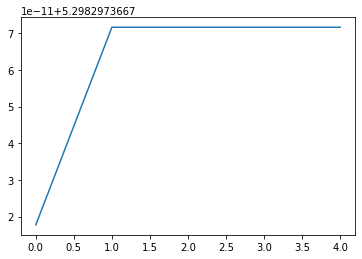

In [41]:
plt.plot(range(len(sdnnc_n.cee_array)), sdnnc_n.cee_array)
print(sdnnc_n.cee_array)
plt.show()